## Загрузка библиотек

In [1]:
import pandas as pd
!pip install -U -q imbalanced-learn

     |████████████████████████████████| 174kB 8.8MB/s 
     |████████████████████████████████| 22.2MB 1.4MB/s 


## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [2]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    pad_data = pd.read_csv(path_to_csv)
    return pad_data, pd.DataFrame([None for i in range(len(pad_data))])


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    pad_data = pd.read_csv(path_to_csv)
    return pad_data.drop("target", axis=1), pad_data["target"]

In [3]:
COVID_DATA_PATH = "/content/sample_data/country_vaccinations.csv"# YOUR_CODE
HR_DATA_PATH = "/content/sample_data/aug_train.csv" # YOUR_CODE 

In [5]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.  (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

In [ ]:
import scipy.stats as stats

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary


resumetable(X_hr)

Dataset Shape: (19158, 13)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,enrollee_id,int64,0,19158,8949,29725,11561,14.23
1,city,object,0,123,city_103,city_40,city_21,4.77
2,city_development_index,float64,0,93,0.92,0.776,0.624,4.41
3,gender,object,4508,3,Male,Male,NaN,0.52
4,relevent_experience,object,0,2,Has relevent experience,No relevent experience,No relevent experience,0.86
5,enrolled_university,object,386,3,no_enrollment,no_enrollment,Full time course,1.04
6,education_level,object,460,5,Graduate,Graduate,Graduate,1.48
7,major_discipline,object,2813,6,STEM,STEM,STEM,0.76
8,experience,object,65,22,>20,15,5,4.14
9,company_size,object,5938,8,NaN,50-99,NaN,2.83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6553a11b70>,
      dtype=object)

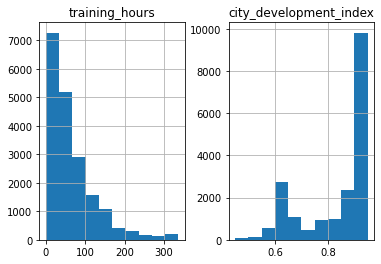

In [ ]:
X_hr[["training_hours", "city_development_index"]].hist()

#### 2.  (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [ ]:
print(f'Исходный размер датасета hr {len(X_hr)}')

Исходный размер датасета hr 19158


In [ ]:
X_hr_dropna = X_hr.dropna()

In [ ]:
print(f'Pазмер датасета hr без NaN {len(X_hr_dropna)}')

Pазмер датасета hr без NaN 8955


_Ваш ответ_

Давайте попробуем избежать сокращения размера датасета.

*   Новый пункт
*   Новый пункт



#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

In [ ]:
# I choice median for numeric features because their distribution pretty asymmetric, for categorical I use mode or natural suggestions  

In [ ]:
import scipy.stats.mstats as mstats


def fill_na(X, y):
    # return data with out NaN
    values_for_company = [["company_size", "unemployed"], ["company_type", "unemployed"], ["gender", "unspecified"]]

    numeric = ["training_hours"]
    X_fill, y_fill = X.copy(), y.copy()
    
    # numerical
    X_fill[numeric] = X_fill[numeric].fillna("median")

    # some understandable filling in
    for  column, value in values_for_company:
        X_fill[column].fillna(value, inplace=True)

    # other
    for column in X_fill.columns:
        nulls_id = X_fill[column].isna()

        if nulls_id.sum() < 250:
            X_fill = X_fill[~nulls_id]
            y_fill = y_fill[~nulls_id]
        else:
            X_fill[column].fillna(X_fill[column].mode().iloc[0], inplace=True)

    return X_fill.reset_index(drop=True), y_fill.reset_index(drop=True)

In [ ]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)
print(f'Pазмер датасета hr без NaN {len(X_hr_fill)}')

Pазмер датасета hr без NaN 19093


#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

In [ ]:
resumetable(X_hr_fill)

Dataset Shape: (19093, 13)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,enrollee_id,int64,0,19093,8949,29725,11561,14.22
1,city,object,0,123,city_103,city_40,city_21,4.77
2,city_development_index,float64,0,93,0.92,0.776,0.624,4.41
3,gender,object,0,4,Male,Male,unspecified,1.18
4,relevent_experience,object,0,2,Has relevent experience,No relevent experience,No relevent experience,0.86
5,enrolled_university,object,0,3,no_enrollment,no_enrollment,Full time course,1.03
6,education_level,object,0,5,Graduate,Graduate,Graduate,1.46
7,major_discipline,object,0,6,STEM,STEM,STEM,0.67
8,experience,object,0,22,>20,15,5,4.14
9,company_size,object,0,9,unemployed,50-99,unemployed,2.85


Distribution of features have not changed so much except gender, company_size, company_type

### Задание 3 (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [ ]:
resumetable(X_covid)

Dataset Shape: (2468, 15)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,country,object,0,80,Algeria,Algeria,Andorra,6.07
1,iso_code,object,233,75,DZA,DZA,AND,5.98
2,date,object,0,57,2021-01-29,2021-01-30,2021-01-25,5.61
3,total_vaccinations,float64,851,1579,0,30,576,10.58
4,people_vaccinated,float64,1128,1313,NaN,NaN,576,10.33
5,people_fully_vaccinated,float64,1676,726,NaN,NaN,NaN,9.35
6,daily_vaccinations_raw,float64,1141,1275,NaN,30,NaN,10.28
7,daily_vaccinations,float64,97,1936,NaN,30,NaN,10.57
8,total_vaccinations_per_hundred,float64,851,684,0,0,0.75,8.84
9,people_vaccinated_per_hundred,float64,1128,604,NaN,NaN,0.75,8.74


In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

group = X_covid.groupby("country").count()["date"]
country = group[group==46].index[0]
print(f"The country with 46 vaccination dates: {country}")


import plotly.express as px

fig = px.line(X_covid[X_covid["country"] == country], x='date', y="total_vaccinations")
fig.show()



The country with 46 vaccination dates: Chile


In [ ]:
X_covid[X_covid["country"] == country] = X_covid[X_covid["country"] == country].sort_values("date").fillna(method="ffill")


import plotly.express as px

fig = px.line(X_covid[X_covid["country"] == country], x='date', y="total_vaccinations")
fig.show()

It's basic way to fill Nan for time series

### Задание 4  (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


In [ ]:
# Hists of continuous features looks smooth, I think data didn't contain outliers 

_Ваш ответ_

### Задание 5  (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

def encode(X):
    # Возвращает данные без категориальных признаков
    columns = ['gender', 'relevent_experience', 'enrolled_university',
               'education_level', 'major_discipline', 'experience', 
               'company_size', 'company_type', 'last_new_job']

            
    # Label encoding
    enc = OneHotEncoder()
    cat_encoded = pd.DataFrame(enc.fit_transform(X[columns]).toarray())
    X_encode = pd.concat([X.drop(columns, axis=1).reset_index(drop=True), cat_encoded], axis=1)

    # Frequency encoding
    freqs = dict((X_encode.groupby('city').size()) / len(X_encode))
    X_encode['city'] = X_encode["city"].apply(lambda x: freqs[x])

    return X_encode

In [ ]:
X_hr_encode = encode(X_hr_fill)

I guess the city is an important feature to understand how many people live there, therefore I use freq encoding. For other cases, my choice is one hot

### Задание 6 (3.5 балла)

Выполните задание для датасета _hr_.




#### 1. (1 балл)
Реализуйте функцию undersampling

#### 2. (1 балл)
Реализуйте функцию oversampling

In [ ]:
import numpy as np

def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    ones = np.where(y == 1)[0]
    zeros = np.where(y == 0)[0]
    big, small = (zeros, ones) if len(zeros) > len(ones) else (ones, zeros)
    random_id = np.random.choice(len(big), len(big) - len(small), replace=False)

    return X.drop(big[random_id]), y.drop(big[random_id])

def oversampling(X, y):
    ones = np.where(y == 1)[0]
    zeros = np.where(y == 0)[0]
    big, small = (zeros, ones) if len(zeros) > len(ones) else (ones, zeros)
    random_id = np.random.choice(len(small), len(big))
    our_id = np.concatenate([small[random_id], big])
    # Возвращает данные, сбалансированные методом oversampling
    return X.iloc[our_id], y.iloc[our_id]

In [ ]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

#### 3. (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [ ]:
from imblearn.over_sampling import SMOTENC

smote = SMOTENC([1] + [i for i in range(4, X_hr_encode.shape[1])])
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode, y_hr_fill)

In [ ]:
X_hr_SMOTE

,enrollee_id,city,city_development_index,training_hours,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,8949,0.227151,0.920000,36,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,29725,0.003562,0.776000,47,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,11561,0.140627,0.624000,83,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33241,0.002828,0.789000,52,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,666,0.006704,0.767000,8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,23958,0.140627,0.920000,15,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
28674,29225,0.227151,0.920000,18,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
28675,12991,0.012832,0.826147,57,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28676,27682,0.022521,0.882558,15,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6540b78cf8>,
      dtype=object)

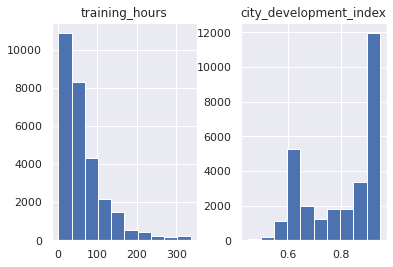

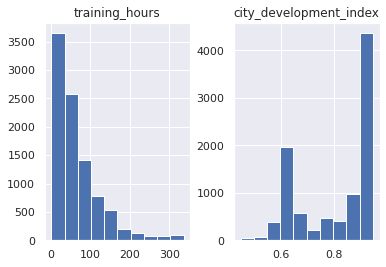

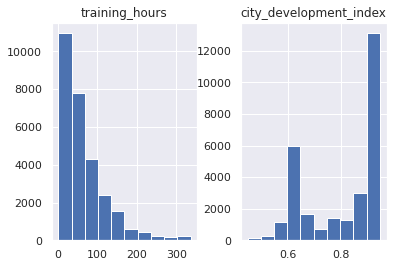

In [ ]:
X_hr_SMOTE[["training_hours", "city_development_index"]].hist()
X_hr_under[["training_hours", "city_development_index"]].hist()
X_hr_over[["training_hours", "city_development_index"]].hist()

The distributions look very similar but smote contain more difference values